## GradientBoostingClassifier


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("SAML-D.csv")

# Quick check of columns and head 
print("Columns in dataset:", data.columns.tolist())
print(data.head())

# Fill missing values
data.fillna(0, inplace=True)

# Combine 'Date' and 'Time' into datetime and extract useful features
data["Datetime"] = pd.to_datetime(data["Date"] + " " + data["Time"], errors='coerce')
data["Hour"] = data["Datetime"].dt.hour
data["DayOfWeek"] = data["Datetime"].dt.dayofweek
data["Month"] = data["Datetime"].dt.month

# Drop original time columns 
data.drop(["Time", "Date", "Datetime"], axis=1, inplace=True)

# Define features and target 
X = data.drop("Is_laundering", axis=1)
y = data["Is_laundering"]

# One-hot encode categorical columns 
categorical_cols = ["Payment_currency", "Received_currency", "Sender_bank_location", 
                    "Receiver_bank_location", "Payment_type", "Laundering_type"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Fill any new NaNs caused during processing 
X = X.fillna(0)

# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Columns in dataset: ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Is_laundering', 'Laundering_type']
       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  07/10/2022      8724731955        2769355426   1459.15   
1  10:35:20  07/10/2022      1491989064        8401255335   6019.64   
2  10:35:20  07/10/2022       287305149        4404767002  14328.44   
3  10:35:21  07/10/2022      5376652437        9600420220  11895.00   
4  10:35:21  07/10/2022      9614186178        3803336972    115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds    

Gradient Boosting Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209529
           1       0.99      0.97      0.98       186

    accuracy                           1.00    209715
   macro avg       1.00      0.99      0.99    209715
weighted avg       1.00      1.00      1.00    209715



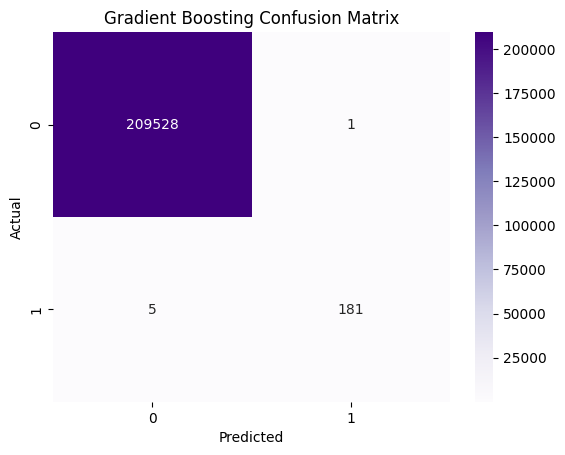

In [ ]:
# Import GBM
from sklearn.ensemble import GradientBoostingClassifier

# Check for any remaining NaNs just in case
if X_train.isnull().values.any() or X_test.isnull().values.any():
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="mean")  # Or use "median"
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)
gbm_preds = gbm_model.predict(X_test)

# Classification report
print("Gradient Boosting Machine Classification Report:")
print(classification_report(y_test, gbm_preds))

# Confusion matrix
conf_matrix_gbm = confusion_matrix(y_test, gbm_preds)
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Purples')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
